In [95]:
import os

import matplotlib.pyplot as plt

import json

import numpy as np
from scipy.integrate import quad

from BoltzTraP2.fd import FD, dFDde

In [ ]:
basedir='../examples/Graphene'

# Analytic Expressions for Transport Integrals

In [522]:
hbar = 6.582e-4 # eV * Picosecond
ElementaryCharge = 1.602176634e-7 # Ampere * Picosecond
vF = 5.496 # eV * Å
dTaudEps = 4.5/0.4 # Picosecond / eV

def density(eps, mu, kBT, vF):
    gv = 2 # valley degeneracy
    gs = 2 # spin degeneracy
    return (gs*gv/(2*np.pi)) * np.abs(eps)/vF**2 * FD(eps, mu, kBT)

def conductivity(eps, mu, kBT, vF):
    gv = 2 # valley degeneracy
    gs = 2 # spin degeneracy    
    return ElementaryCharge / hbar**2 * (gs*gv/(2*np.pi)) * np.abs(eps) * (-dFDde(eps,mu,kBT))

def conductivity_tau(eps, mu, kBT, vF):
    gv = 2 # valley degeneracy
    gs = 2 # spin degeneracy
    return ElementaryCharge / hbar**2 * (gs*gv/(2*np.pi)) * np.abs(eps) * (-dFDde(eps,mu,kBT)) * 1/(np.abs(eps)*dTaudEps)

# Dftbephy Results

In [521]:
with open(basedir +'/el-ph/transport.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

conductivities = np.array(data['conductivities'])
conductivities0 = np.array(data['conductivities0'])
densities = np.array(data['densities'])
densities0 = np.array(data['densities0'])
own_mus = np.array(data['mus'])
own_EF = np.array(data['EF'])
cell_area = data['cell_area']
own_kBT = data['kBTs'][0]

In [523]:
# numerically intregrate analytic integrands
ana_densities = np.array([quad(density, 0, 5, args=(mu,own_kBT, vF), points=[0,mu])[0] for mu in (own_mus-own_EF)])

ana_conductivities = np.array([quad(conductivity, -5, 5, args=(mu,own_kBT, vF), points=[0,mu])[0] for mu in (own_mus-own_EF)])

ana_conductivities_tau = np.array([quad(conductivity_tau, -5, 5, args=(mu,own_kBT, vF), points=[0,mu])[0] for mu in (own_mus-own_EF)])


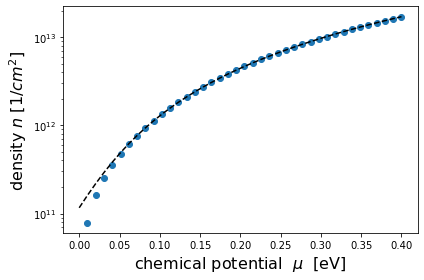

In [524]:
plt.scatter((own_mus[1:] - own_EF), densities[1:]*1e16)

plt.plot((own_mus - own_EF), ana_densities * 1e16, 'k--')

plt.xlabel(r'chemical potential  $\mu$  [eV]', fontsize=16)
plt.ylabel(r'density $n$ [1/$cm^2$]', fontsize=16)

plt.gca().set_yscale('log')
plt.tight_layout()
plt.show()
#plt.savefig(basedir +'/el-ph/graphene-dftb-density.pdf')

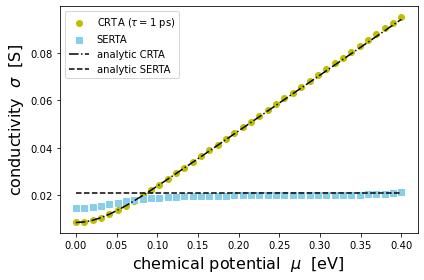

In [525]:
plt.scatter((own_mus - own_EF), (conductivities0[:,0,0]+conductivities0[:,1,1])*(units.qe_SI/1e-20), color="y", label=r'CRTA ($\tau=1$ ps)')
plt.scatter((own_mus - own_EF), (conductivities[:,0,0]+conductivities[:,1,1])*(units.qe_SI/1e-20), color="skyblue", marker='s', label=r'SERTA')

plt.plot((own_mus - own_EF),
            ana_conductivities, 'k-.', label='analytic CRTA')
plt.plot((own_mus - own_EF),
            ana_conductivities_tau, 'k--', label='analytic SERTA')

plt.xlabel(r'chemical potential  $\mu$  [eV]', fontsize=16)
plt.ylabel(r'conductivity  $\sigma$  [S]', fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig(basedir +'/el-ph/graphene-dftb-conductivity.pdf')

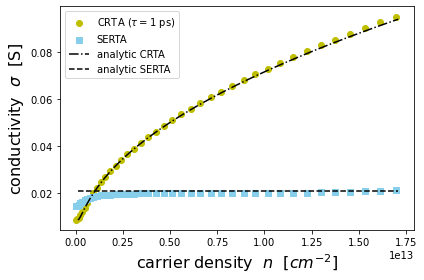

In [526]:
plt.scatter(densities* 1e16, (conductivities0[:,0,0]+conductivities0[:,1,1])*(units.qe_SI/1e-20), color="y", label=r'CRTA ($\tau=1$ ps)')
plt.scatter(densities* 1e16, (conductivities[:,0,0]+conductivities[:,1,1])*(units.qe_SI/1e-20), color="skyblue", label=r'SERTA', marker='s')

plt.plot(ana_densities * 1e16,
            ana_conductivities, 'k-.', label='analytic CRTA')
plt.plot(ana_densities * 1e16,
            ana_conductivities_tau, 'k--', label='analytic SERTA')

plt.xlabel(r'carrier density  $n$  [$cm^{-2}$]', fontsize=16)
plt.ylabel(r'conductivity  $\sigma$  [S]', fontsize=16)
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig(basedir +'/el-ph/graphene-dftb-conductivity.pdf')

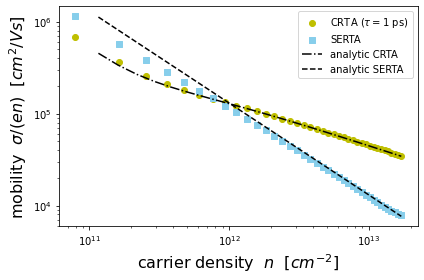

In [527]:
plt.scatter(densities[1:]* 1e16, 1e4*(conductivities0[1:,0,0]+conductivities0[1:,1,1])/densities[1:], color="y", label=r'CRTA ($\tau=1$ ps)')
plt.scatter(densities[1:]* 1e16, 1e4*(conductivities[1:,0,0]+conductivities[1:,1,1])/densities[1:], color="skyblue", label=r'SERTA', marker='s')

plt.plot(ana_densities * 1e16, 
            1e4* 1e-8 *ana_conductivities / (ElementaryCharge*ana_densities), 'k-.', label='analytic CRTA')
plt.plot(ana_densities * 1e16, 
            1e4* 1e-8 *ana_conductivities_tau / (ElementaryCharge*ana_densities), 'k--', label='analytic SERTA')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.xlabel(r'carrier density  $n$  [$cm^{-2}$]', fontsize=16)
plt.ylabel(r'mobility  $\sigma/(e n)$  [$cm^{2}/V s$]', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig(basedir +'/el-ph/graphene-dftb-mobility.pdf')